In [17]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('./drinks.csv')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


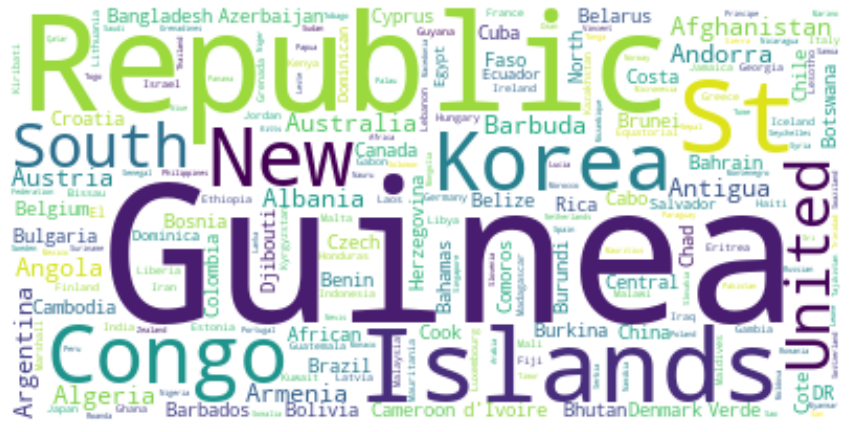

In [19]:
text = " ".join(i for i in data.country)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import scipy.cluster.hierarchy as sch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

In [23]:
import seaborn as sns
sns.set_style("whitegrid")

In [24]:
clustdf=pd.read_csv("./drinks.csv", index_col=0)


In [25]:
clustdf.head(1)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0


In [26]:
clustdf.shape

(193, 4)

In [27]:
clustdf_t=clustdf.transpose()

In [28]:
c_dist = pdist(clustdf_t) # computing the distance
c_link = linkage(clustdf_t,  metric='correlation', method='complete')# computing the linkage

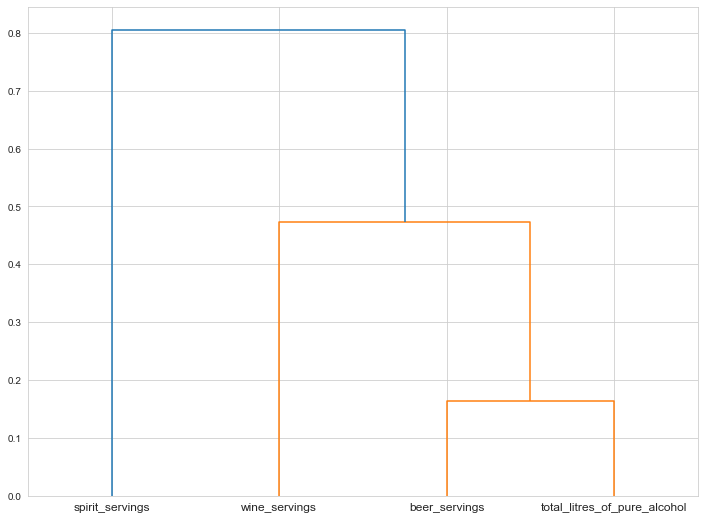

In [29]:
B=dendrogram(c_link,labels=list(clustdf.columns))

In [30]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

In [31]:
def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    return get_cluster_classes(B)

In [32]:
def give_cluster_assigns(df, numclust, tranpose=True):
    if transpose==True:
        data_dist = pdist(df.transpose())
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.columns)
    else:
        data_dist = pdist(df)
        data_link = linkage(data_dist,  metric='correlation', method='complete')
        cluster_assigns=pd.Series(sch.fcluster(data_link, numclust, criterion='maxclust', monocrit=None), index=df.index)
    for i in arange(1,numclust+1):
        print("Cluster ",str(i),": ( N =",len(cluster_assigns[cluster_assigns==i].index),")", ", ".join(list(cluster_assigns[cluster_assigns==i].index)))

Not saving


C1,"['Andorra', 'Luxembourg', 'Croatia', 'Denmark', 'Switzerland', 'Portugal', 'France', 'Australia', 'Austria', 'Netherlands', 'Belgium', 'Slovenia', 'Argentina', 'Sweden', 'Italy', 'Uruguay', 'Equatorial Guinea', 'Malta', 'Norway', 'Chile', 'Greece', 'New Zealand', 'United Kingdom', 'Chile']"
C2,"['Palau', 'Venezuela', 'Gabon', 'Namibia', 'Lithuania', 'Poland', 'Latvia', 'Ireland', 'Romania', 'Germany', 'Czech Republic', 'Hungary', 'Serbia', 'Spain', 'Canada', 'Finland', 'USA', 'Paraguay', 'Cyprus', 'Belize', 'Panama', 'Brazil', 'Iceland', 'South Africa', 'Angola', 'Mexico']"
C3,"['Belarus', 'Grenada', 'Estonia', 'Ukraine', 'Bulgaria', 'St. Lucia', 'Slovakia', 'Russian Federation']"
C4,"['Dominica', 'Guyana', 'Haiti', 'Cook Islands', 'Albania', 'Antigua & Barbuda', 'Honduras', 'Jamaica', 'Nicaragua', 'Cuba', 'Liberia', 'United Arab Emirates', 'Armenia', 'Kyrgyzstan', 'Uzbekistan', 'India', 'Sri Lanka', 'Niue', 'St. Kitts & Nevis', 'Dominican Republic', 'Trinidad & Tobago', 'Peru', 'Moldova', 'St. Vincent & the Grenadines', 'Kazakhstan', 'Thailand', 'Bahamas', 'Barbados', 'Suriname', 'China', 'Mongolia', 'Philippines', 'Bosnia-Herzegovina', 'Japan']"
C5,"['Georgia', 'Montenegro', 'Laos', 'Sao Tome & Principe', 'Macedonia', 'Fiji', 'Lesotho', 'Mauritius', 'Samoa', 'Burundi', 'Swaziland', 'Congo', 'Vietnam', 'Colombia', 'Ecuador', 'Costa Rica', 'Cameroon', 'South Korea', 'Botswana', 'Seychelles', 'Bolivia', 'Cabo Verde', 'Botswana', 'Lebanon', 'Turkmenistan', 'El Salvador', 'Guatemala', 'Cambodia', 'Israel', 'Bahrain', 'Micronesia', 'Nauru', 'Tunisia', 'Nigeria', 'Rwanda', 'Uganda', 'Mozambique', 'Turkey', 'Kenya', 'Zimbabwe', 'Singapore', 'Solomon Islands', 'Kenya', 'Qatar', 'Tuvalu', 'Syria', 'Azerbaijan', 'Djibouti', 'Kiribati', 'Tonga', 'Zambia', 'Madagascar', 'Oman', 'Vanuatu', 'Guinea-Bissau', 'Papua New Guinea', 'Burkina Faso', 'Sierra Leone', 'Brunei', 'DR Congo', 'Tanzania', 'Algeria', 'Togo', 'Benin', 'Ghana', ""Cote d'Ivoire"", 'Morocco', 'Senegal', 'Bhutan', 'Ethiopia', 'Central African Republic', 'Chad', 'Eritrea', 'Malaysia', 'Malawi', 'Sudan', 'Jordan', 'Tajikistan', 'Egypt', 'Nepal', 'Gambia', 'Guinea', 'Iraq', 'Indonesia', 'Myanmar', 'Mali', 'Yemen', 'Comoros', 'Niger', 'Timor-Leste', 'Afghanistan', 'Bangladesh', 'North Korea', 'Iran', 'Kuwait', 'Libya', 'Maldives', 'Marshall Islands', 'Mauritania', 'Monaco', 'Pakistan', 'San Marino', 'Somalia', 'Saudi Arabia']"


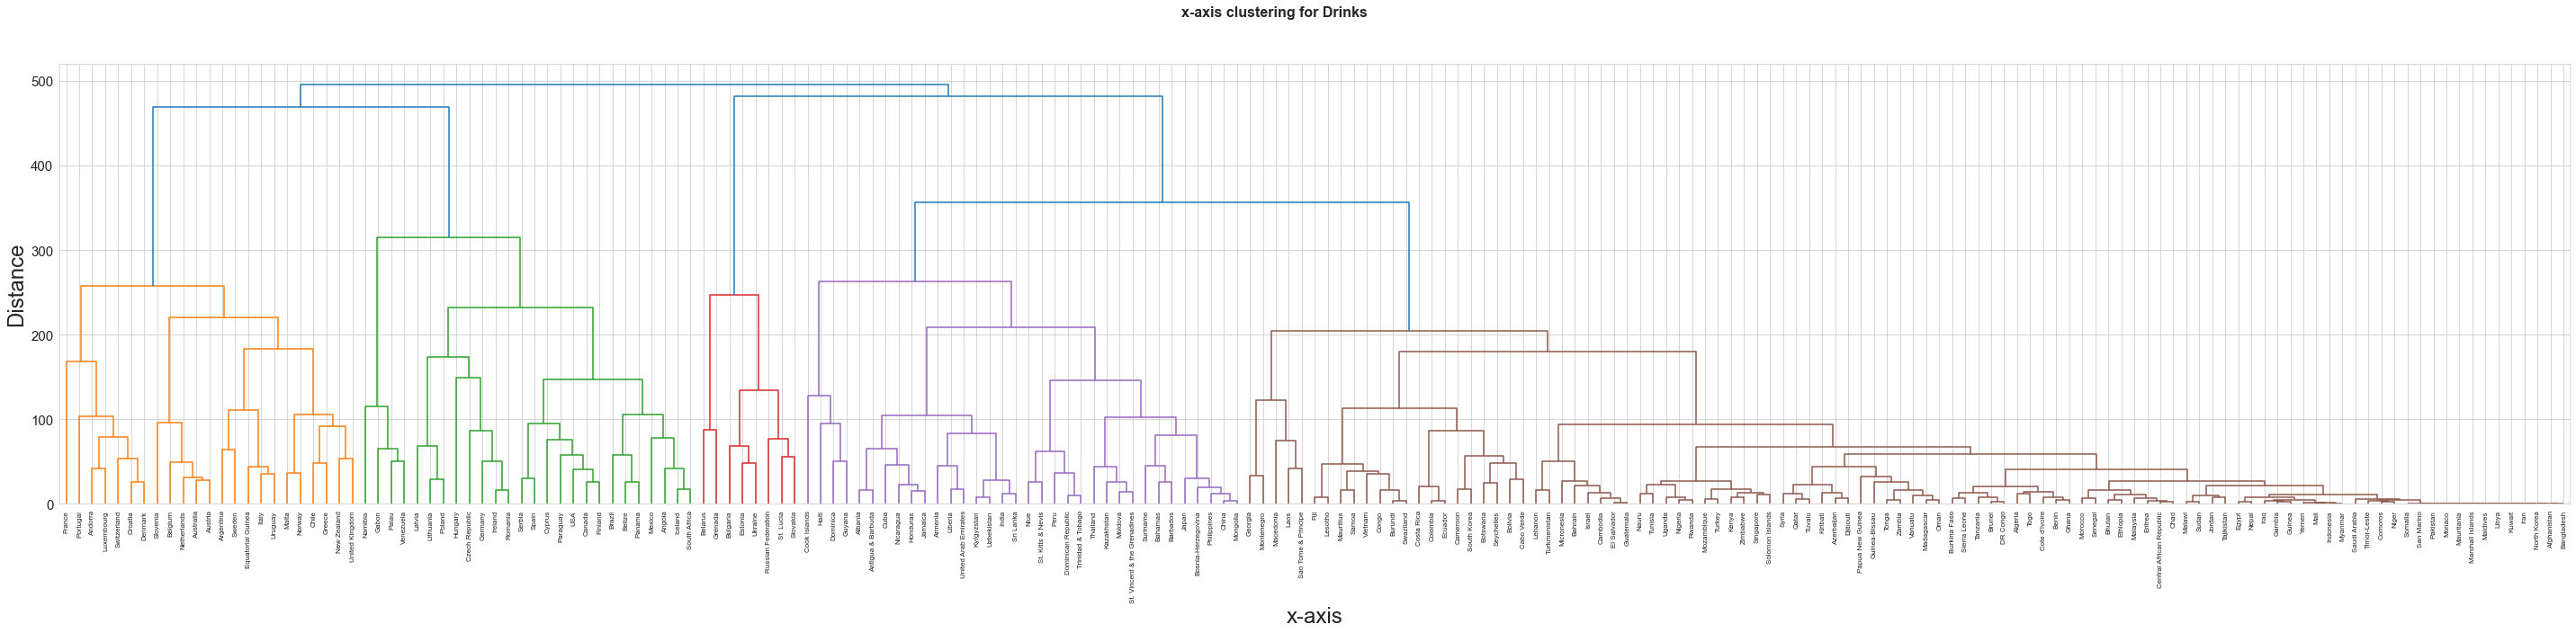

In [39]:
get_clust_graph(clustdf, 193, transpose=True,dataname="Drinks")